Travelling AI student starts from Tampere and returns to Tampere. He visits Toijala, Vesilahti and Sastamala. Find the shortest possible path for him to complete the round-trip route. (Travelling salesman problem)

### The Adjacency Matrix
<div>
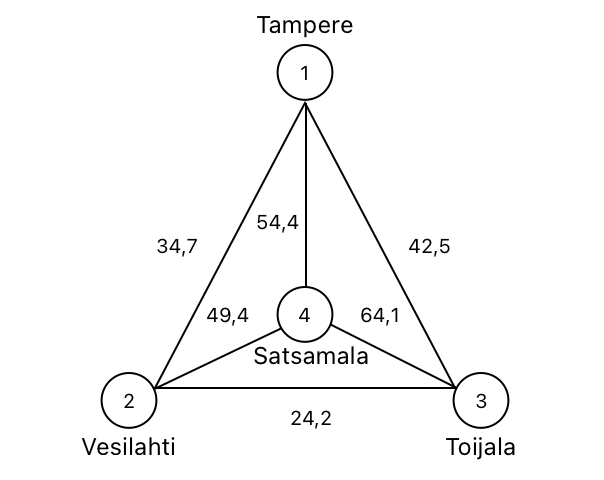
</div>
<div>
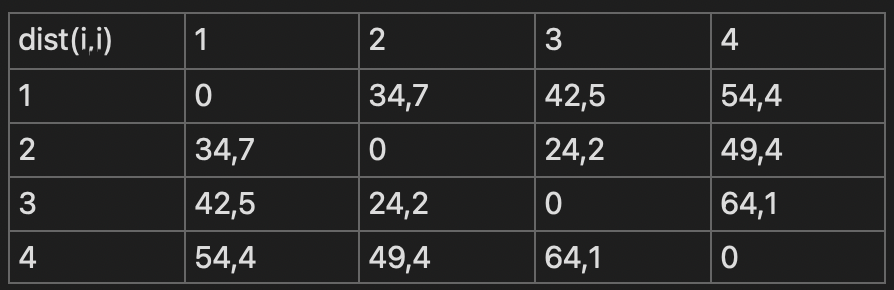
</div>

For this task I have chosen dynamic programming method.

Task: Start point at 1 (Tampere), visit other places(2,3,4) once and return to the start position 1 (Tampere).  

Weight: the distance which each edge represents. 

In this task we meet with Travelling Salesman Problem, shortly - TSP, which is NP-hard problem type. It means no polynomial time algorithm. In this case it is not very complex because we don't have a big amount of cities, just 4.

In [1]:
from sys import maxsize
from itertools import permutations

V = 4 #set of vertices
 
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:

        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
 
        # update minimum
        min_path = min(min_path, current_pathweight)
         
    return min_path
 
 

if __name__ == "__main__":
 
    # matrix representation of graph
    graph = [[0, 34.7, 42.5, 54.4], [34.7, 0, 24.2, 49.4], [42.5, 24.2, 0, 64.1], [54.4, 49.4, 64.1, 0]]
    s = 0
    print(travellingSalesmanProblem(graph, s))

170.5


In [2]:
from IPython.display import display
import pandas as pd

dict = {0 : [0, 34.7, 42.5, 54.4],
        1 : [34.7, 0, 24.2, 49.4],
        2 : [42.5, 24.2, 0, 64.1],
        3 : [54.4, 49.4, 64.1, 0]}
df = pd.DataFrame(dict)

display(df)

,0,1,2,3
0,0.0,34.7,42.5,54.4
1,34.7,0.0,24.2,49.4
2,42.5,24.2,0.0,64.1
3,54.4,49.4,64.1,0.0


In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

Here we use mlrose library.
Steps:
1. Make a fitness function
2. Then find optimization problem
3. And after that finally get the results from the randomized optimization algorithm 

In [4]:
# For initializing fitness function we need coordinates,
# down below is also deffined the distance between them for our goal of this task
dist_list = [(0, 1, 34,7), (0, 2, 42.5), (0, 3, 54.4), \
             (1, 2, 24.2), (1, 3, 49.4), \
             (2, 3, 64.1)]

# Initializing fitness function object using distance list
fitness_dists = mlrose.TravellingSales(distances = dist_list)
print(fitness_dists)

In [5]:
# to initialize TSPOpt we need to define length(number of cities, fitness function, 
# maximization is false cause we are searching for the shortest route)
problem_fit = mlrose.TSPOpt(length = 4, fitness_fn = fitness_dists,
                            maximize=False)

In [6]:
# Solving problem with the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit, mutation_prob = 0.2, 
					      max_attempts = 100, random_state = 2)

print('The best state found is: ', best_state)

print('The fitness at the best state is: ', best_fitness)

The best state found is:  [0 2 1 3]
The fitness at the best state is:  170.5


## Conclusion

I used several different codes for this task.   
Both of them showed the same result, which also proves, that these methods work well.  

#### The best order for this route would be 1,3,2,4,1 which gives us the shortest distance 170,5 km.  
Tampere -> Toijala -> Vesilahti -> Satsamala -> Tampere  

#### It also could be reversed. 